In [1]:
import sys; sys.path.insert(0, '../')
import geoplot as gplt
import geoplot.crs as ccrs
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import shapely

In [3]:
collisions = pd.read_csv("../data/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv")
def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return shapely.geometry.Point(0, 0)
    else:
        return shapely.geometry.Point(long, lat)

collisions = gpd.GeoDataFrame(collisions.head(5000), geometry=collisions.head(5000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

In [4]:
boroughs = gpd.read_file("../data/nyc_boroughs/boroughs.geojson")

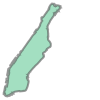

In [47]:
[p for p in boroughs.geometry.iloc[3]][-3]

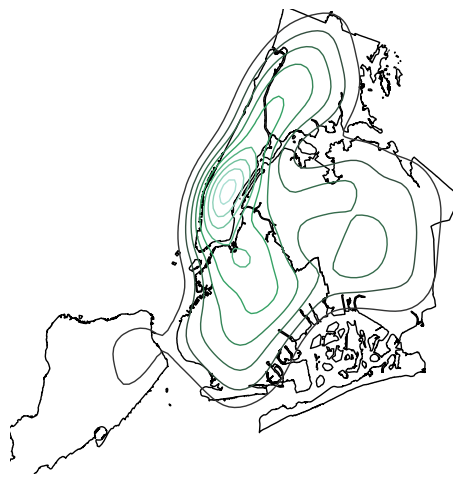

In [38]:
ax = gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea())
gplt.kdeplot(collisions, projection=ccrs.AlbersEqualArea(), ax=ax)

> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(1526)kdeplot()
-> kde = sns.kdeplot(pd.Series([p.x for p in df.geometry]), pd.Series([p.y for p in df.geometry]),
(Pdb) c


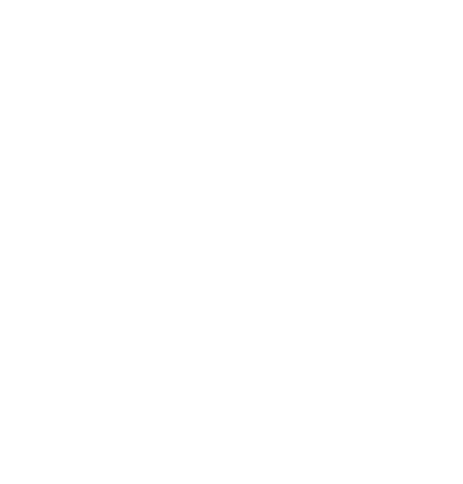

In [6]:
gplt.kdeplot(collisions, clip=boroughs.geometry, projection=ccrs.AlbersEqualArea())

In [ ]:
%debug

In [35]:
import seaborn as sns

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt

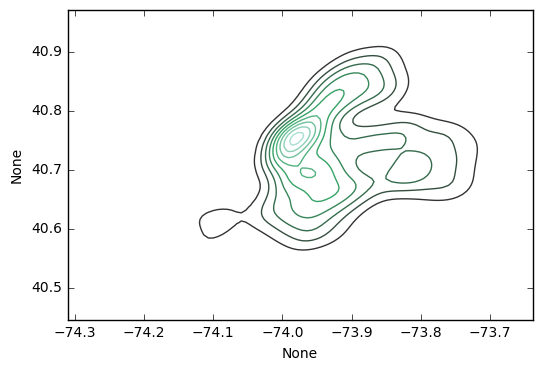

In [49]:
kde = sns.kdeplot(pd.Series([p.x for p in collisions.geometry]), pd.Series([p.y for p in collisions.geometry]))
staten_island = [p for p in boroughs.geometry.iloc[0]][3]
mock_coords = [c for c in staten_island.envelope.exterior.coords]
poly = mpl.patches.Polygon(mock_coords, closed=True, facecolor='red')
ax = plt.gca()
patch = mpl.patches.Circle((300,300), radius=100)
kde.set_clip_path(patch)

(-0.5, 9.5)
(9.5, -0.5)


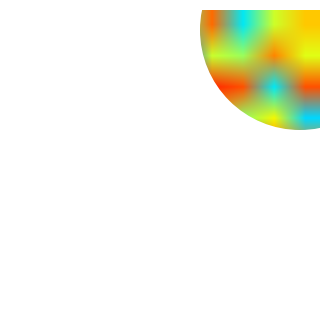

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

im = ax.imshow(np.random.rand(10,10))

print(ax.get_xlim())
print(ax.get_ylim())

patch = mpl.patches.Circle((300,300), radius=100)
im.set_clip_path(patch)

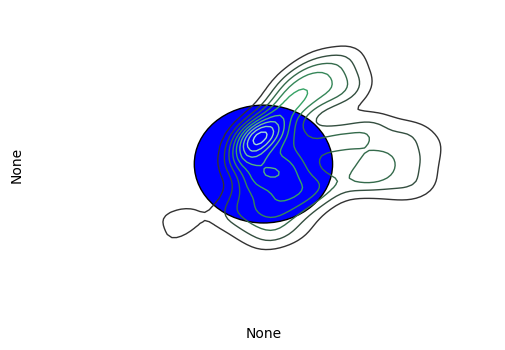

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

kde = sns.kdeplot(pd.Series([p.x for p in collisions.geometry]), pd.Series([p.y for p in collisions.geometry]),
                  ax=ax)

xmin, xmax = kde.get_xlim()
ymin, ymax = kde.get_ylim()

patch = mpl.patches.Circle(((xmin + xmax)/2, (ymin + ymax) / 2), radius=0.1)
ax.add_patch(patch)
kde.set_clip_path(patch)

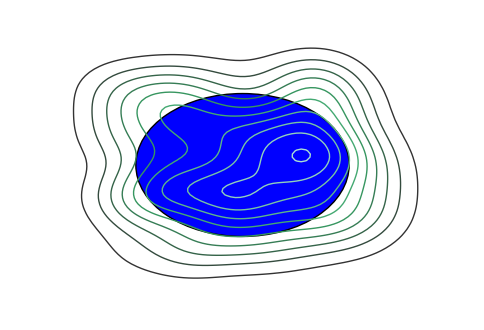

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

random_points = np.array([p for p in np.random.random(size=(100, 2)) if 0 < p[0] < 1 and 0 < p[1] < 1])

kde = sns.kdeplot(random_points[:,0], random_points[:,1], ax=ax)

xmin, xmax = kde.get_xlim()
ymin, ymax = kde.get_ylim()

patch = mpl.patches.Circle(((xmin + xmax)/2, (ymin + ymax) / 2), radius=0.4)
ax.add_patch(patch)
kde.set_clip_path(patch)

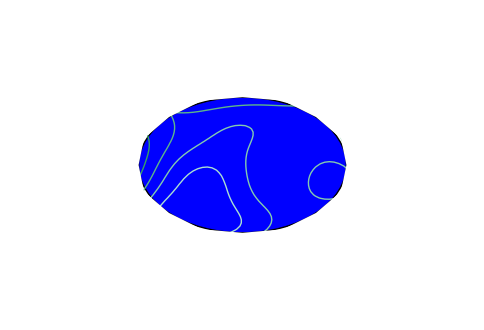

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
sns.reset_orig()

# Color plot except polygon
def mask_outside(poly_verts, facecolor=None, ax = None):
    from matplotlib.patches import PathPatch
    from matplotlib.path import Path

    if ax is None: ax = plt.gca()
    if facecolor is None: facecolor = plt.gcf().get_facecolor()

    # Construct inverse polygon
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    bound_verts = [(xlim[0], ylim[0]), (xlim[0], ylim[1]), 
                   (xlim[1], ylim[1]), (xlim[1], ylim[0]), (xlim[0], ylim[0])]
    bound_codes = [Path.MOVETO] + (len(bound_verts) - 1) * [Path.LINETO]
    poly_codes = [Path.MOVETO] + (len(poly_verts) - 1) * [Path.LINETO]

    # Plot it
    path = Path(bound_verts + poly_verts, bound_codes + poly_codes)
    ax.add_patch(PathPatch(path, facecolor=(1,1,1,1), edgecolor='None', zorder = 1e+3))

# Your example
fig = plt.figure()
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])
random_points = np.array([p for p in np.random.random(size=(100, 2)) if 0 < p[0] < 1 and 0 < p[1] < 1])
kde = sns.kdeplot(random_points[:,0], random_points[:,1], ax=ax)

xmin, xmax = kde.get_xlim()
ymin, ymax = kde.get_ylim()

patch = mpl.patches.Circle(((xmin + xmax) / 2, (ymin + ymax) / 2), radius=0.4)
mask_outside([tuple(x) for x in patch.get_verts()]) # call before add_patch!
ax.add_patch(patch)

plt.show()

In [19]:
%matplotlib inline

In [20]:
gplt.kdeplot(collisions, clip=boroughs.geometry, projection=ccrs.AlbersEqualArea())

> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(1526)kdeplot()
-> kde = sns.kdeplot(pd.Series([p.x for p in df.geometry]), pd.Series([p.y for p in df.geometry]),
(Pdb) c


In [74]:
# coords = [(-74.01311303826316, 40.699774165885245), (-73.975945, 40.716678), (-73.940926, 40.844583), (-74.01311303826316, 40.699774165885245)]
coords = [(-74.01311303826316, 40.699774165885245), (-74.01506818269306, 40.700318257554926), (-74.01509832270128, 40.70033426552343), (-74.01844770243774, 40.70416216823151), (-74.01866830837963, 40.70443524062126), (-74.01892572382415, 40.70477376257028), (-74.01934155704544, 40.70607053820404), (-74.0193425462449, 40.70609367302966), (-74.01121562130413, 40.74869682117579), (-74.01114914281892, 40.74902574726487), (-74.01080815800906, 40.75031931136799), (-74.00997058797023, 40.752933564153146), (-74.00700358904017, 40.75923187034106), (-73.94692626404866, 40.85052805566834), (-73.92917968255972, 40.87555554896635), (-73.92901345809737, 40.87573866059269), (-73.92814623603572, 40.876522528943944), (-73.9264818571844, 40.87761820301787), (-73.92640556921117, 40.87762147653734), (-73.92457036990588, 40.877428912671306), (-73.92354823367553, 40.877301379737034), (-73.92329476733927, 40.87726443545978), (-73.91260884231671, 40.8737674436236), (-73.91250176411442, 40.87372832966796), (-73.91229017490791, 40.873635444491335), (-73.91208146441699, 40.87352884099819), (-73.91163815732521, 40.8733023648452), (-73.91157791409437, 40.873271587474306), (-73.91151516123321, 40.87323662962527), (-73.91142596184434, 40.873181766652394), (-73.91130503459945, 40.873091985392904), (-73.91122441407734, 40.87302775243456), (-73.91117450708147, 40.87298469583897), (-73.91076303115062, 40.872452063617146), (-73.91069663181794, 40.87236327354684), (-73.91064877277678, 40.87229624946576), (-73.91056469338135, 40.872116535820375), (-73.91054082062278, 40.872058327574926), (-73.91042644048508, 40.871485438062045), (-73.9104336357045, 40.87138081638425), (-73.91085334197531, 40.86964860774658), (-73.92903640179627, 40.79676259410125), (-73.92927936741172, 40.79585313952059), (-73.9764287251453, 40.71190903250366), (-73.97655008814222, 40.71173453872828), (-73.9767122153967, 40.71153576517838), (-73.97681883540066, 40.71141956702116), (-73.97699076574628, 40.71125666023054), (-73.97705659401737, 40.71119762696939), (-73.97722213562571, 40.711068731228295), (-73.9775266843264, 40.71084307273315), (-73.9777211949307, 40.7107100746607), (-73.97782091638248, 40.71064544490698), (-73.97789949619445, 40.71059986620236), (-73.97799674790386, 40.710561017391605), (-73.97807974906607, 40.71053225107981), (-74.00862036163878, 40.70055216421584), (-74.01304370092438, 40.699774784735865), (-74.01311303826316, 40.699774165885245)]
xs = [c[0] for c in coords]
ys = [c[1] for c in coords]
poly = mpl.patches.Polygon(
    coords, 
    closed=True, facecolor='red')
fig = plt.figure()
ax = fig.gca()
ax.set_xlim(min(xs), max(xs))
ax.set_ylim(min(ys), max(ys))
ax.add_patch(poly)
import mplleaflet; mplleaflet.show()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.reset_orig()

In [16]:
# Color plot except polygon
def mask_outside(poly_verts, facecolor=None, ax = None):
    from matplotlib.patches import PathPatch
    from matplotlib.path import Path

    if ax is None: ax = plt.gca()
    if facecolor is None: facecolor = plt.gcf().get_facecolor()

    # Construct inverse polygon
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    bound_verts = [(xlim[0], ylim[0]), (xlim[0], ylim[1]), 
                   (xlim[1], ylim[1]), (xlim[1], ylim[0]), (xlim[0], ylim[0])]
    bound_codes = [Path.MOVETO] + (len(bound_verts) - 1) * [Path.LINETO]
    poly_codes = [Path.MOVETO] + (len(poly_verts) - 1) * [Path.LINETO]

    # Plot it
    path = Path(bound_verts + poly_verts, bound_codes + poly_codes)
    ax.add_patch(PathPatch(path, facecolor=(1,1,1,1), edgecolor='None', zorder = 1e+3))

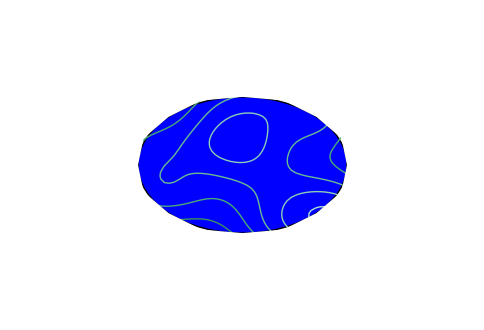

In [20]:
# Your example
fig = plt.figure()
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])
random_points = np.array([p for p in np.random.random(size=(100, 2)) if 0 < p[0] < 1 and 0 < p[1] < 1])
kde = sns.kdeplot(random_points[:,0], random_points[:,1], ax=ax)

xmin, xmax = kde.get_xlim()
ymin, ymax = kde.get_ylim()

patch = mpl.patches.Circle(((xmin + xmax) / 2, (ymin + ymax) / 2), radius=0.4)
# This works:
# mask_outside([tuple(x) for x in patch.get_verts()]) # call before add_patch!
# This works:
gplt.geoplot._mask_outside(patch) # call before add_patch!
ax.add_patch(patch)

plt.show()

[(-74.01311303826316, 40.699774165885245),
 (-74.01506818269306, 40.700318257554926),
 (-74.01509832270128, 40.70033426552343),
 (-74.01844770243774, 40.70416216823151),
 (-74.01866830837963, 40.70443524062126),
 (-74.01892572382415, 40.70477376257028),
 (-74.01934155704544, 40.70607053820404),
 (-74.0193425462449, 40.70609367302966),
 (-74.01121562130413, 40.74869682117579),
 (-74.01114914281892, 40.74902574726487),
 (-74.01080815800906, 40.75031931136799),
 (-74.00997058797023, 40.752933564153146),
 (-74.00700358904017, 40.75923187034106),
 (-73.94692626404866, 40.85052805566834),
 (-73.92917968255972, 40.87555554896635),
 (-73.92901345809737, 40.87573866059269),
 (-73.92814623603572, 40.876522528943944),
 (-73.9264818571844, 40.87761820301787),
 (-73.92640556921117, 40.87762147653734),
 (-73.92457036990588, 40.877428912671306),
 (-73.92354823367553, 40.877301379737034),
 (-73.92329476733927, 40.87726443545978),
 (-73.91260884231671, 40.8737674436236),
 (-73.91250176411442, 40.873728

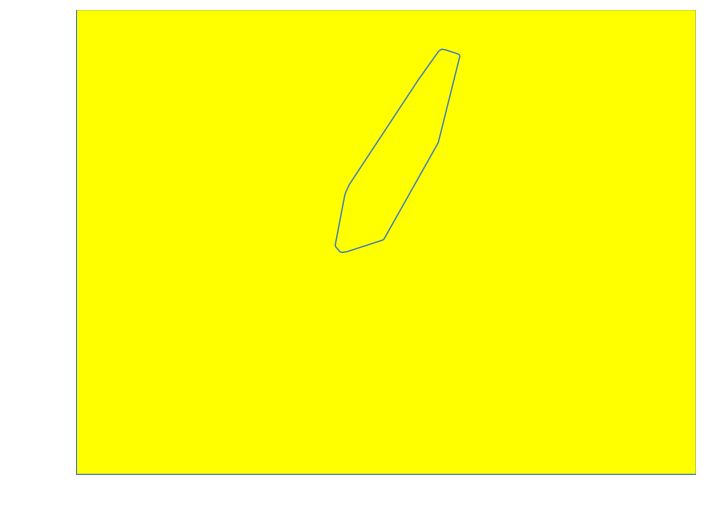

In [109]:
gplt.kdeplot(collisions, clip=boroughs.geometry)

In [94]:
# coords = [(-74.01311303826316, 40.699774165885245), (-73.975945, 40.716678), (-73.940926, 40.844583), (-74.01311303826316, 40.699774165885245)]
coords = _

xs = [c[0] for c in coords]
ys = [c[1] for c in coords]
poly = mpl.patches.Polygon(
    coords, 
    closed=True, facecolor='red')
fig = plt.figure()
ax = fig.gca()
ax.set_xlim(min(xs), max(xs))
ax.set_ylim(min(ys), max(ys))
ax.add_patch(poly)
import mplleaflet; mplleaflet.show()

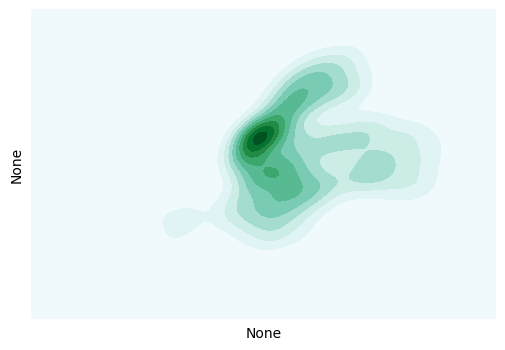

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

kde = sns.kdeplot(pd.Series([p.x for p in collisions.geometry]), pd.Series([p.y for p in collisions.geometry]),
                  ax=ax, shade=True)
xmin, xmax = kde.get_xlim()
ymin, ymax = kde.get_ylim()

plt.savefig("./test.png")

im = mpl.image.imread('./test.png')
# patch = mpl.patches.Circle(((xmin + xmax)/2, (ymin + ymax) / 2), radius=0.1)
# ax.add_patch(patch)
# kde.set_clip_path(patch)

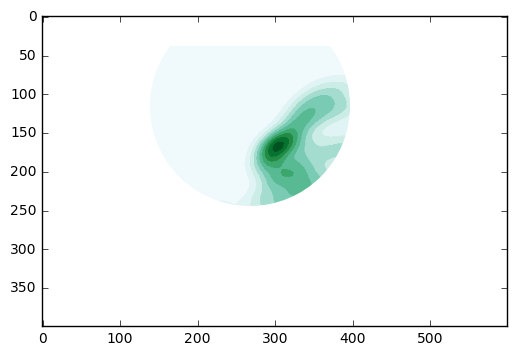

In [120]:
ax = plt.imshow(im)
patch = mpl.patches.Circle((250, 250), radius=100)
# ax.add_patch(patch)
ax.set_clip_path(patch)

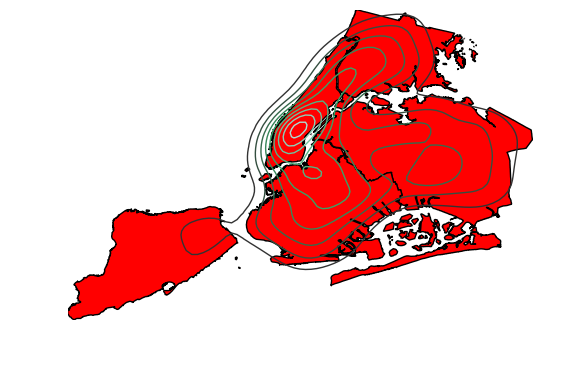

In [126]:
ax = sns.kdeplot(pd.Series([p.x for p in collisions.geometry]), pd.Series([p.y for p in collisions.geometry]))
gplt.polyplot(boroughs, ax=ax, facecolor='red')

In [134]:
ax.get_xlim()

(-74.255591363152149, -73.700009063871221)

In [135]:
ax.get_ylim()

(40.496115395170342, 40.91553277700519)

In [131]:
manhattan = boroughs.iloc[3]['geometry']

In [ ]:
manhattan.envelope.symmetric_difference(manhattan)

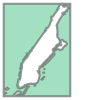

In [132]:
manhattan.envelope.symmetric_difference(manhattan)

In [ ]:
manhattan.envelope.symmetric_difference(manhattan)

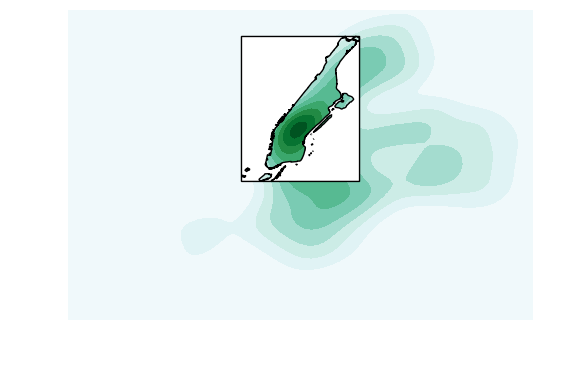

In [144]:
ax = sns.kdeplot(pd.Series([p.x for p in collisions.geometry]), pd.Series([p.y for p in collisions.geometry]),
                 shade=True)
gplt.polyplot(gpd.GeoSeries(manhattan.envelope.symmetric_difference(manhattan)), ax=ax, 
              facecolor='white', zorder=100, extent=(-74.255591363152149, -73.700009063871221, 40.496115395170342, 40.91553277700519))

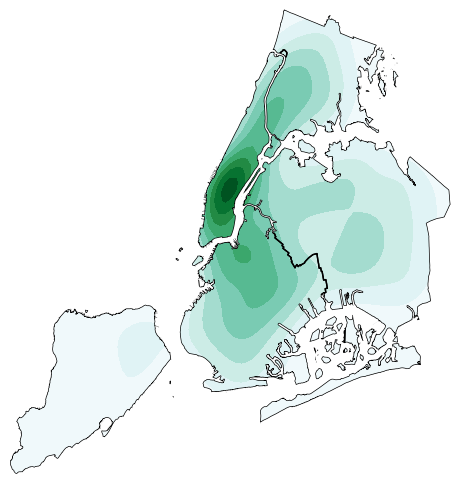

In [50]:
ax = gplt.kdeplot(collisions, projection=ccrs.AlbersEqualArea(), clip=boroughs.geometry, shade=True)
gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea(), ax=ax)

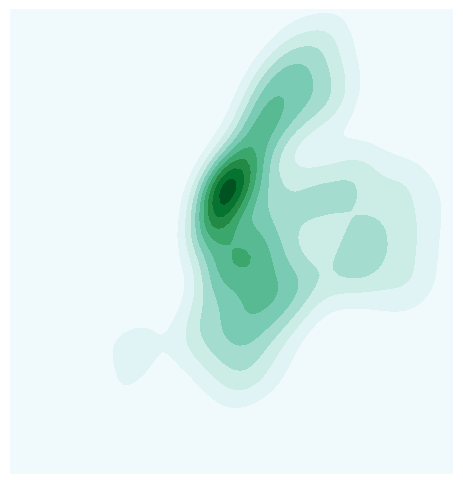

In [51]:
ax = gplt.kdeplot(collisions, projection=ccrs.AlbersEqualArea(), shade=True, legend=True)

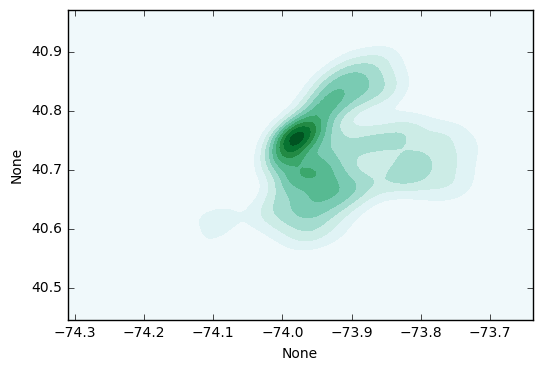

In [60]:
import seaborn as sns
sns.reset_orig()
sns.kdeplot(pd.Series([c.x for c in collisions.geometry]), 
            pd.Series([c.y for c in collisions.geometry]), shade=True, legend=True)

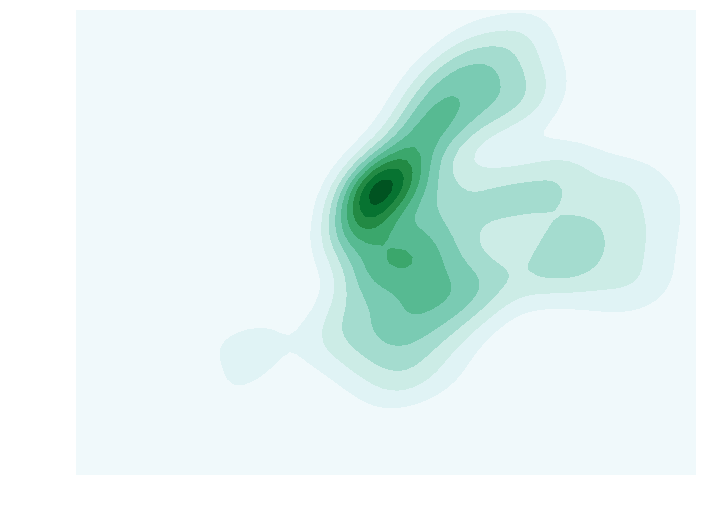

In [52]:
ax = gplt.kdeplot(collisions, shade=True, legend=True)

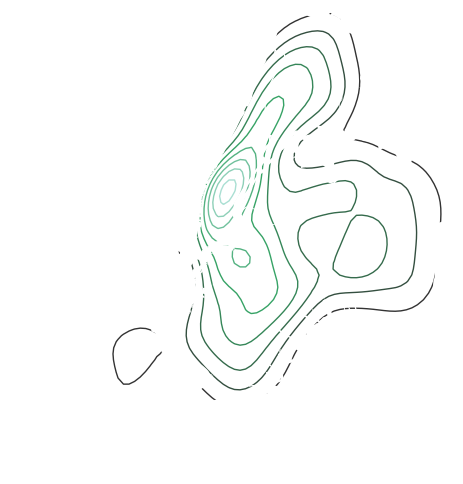

In [38]:
gplt.kdeplot(collisions, projection=ccrs.AlbersEqualArea(), clip=boroughs.geometry)

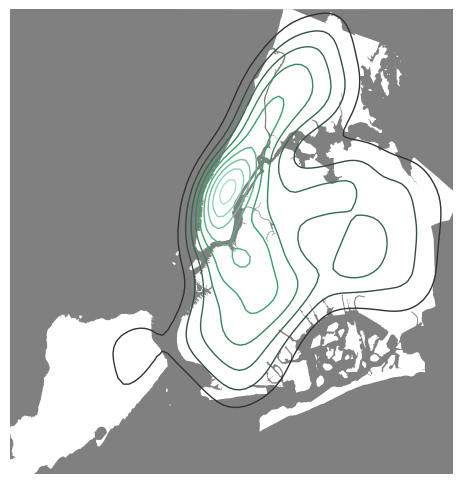

In [34]:
gplt.kdeplot(collisions, projection=ccrs.AlbersEqualArea(), clip=boroughs.geometry, shade=True)

(-26653.138259089592, 17849.515966590727, -24864.275408701284, 21816.28800051263)


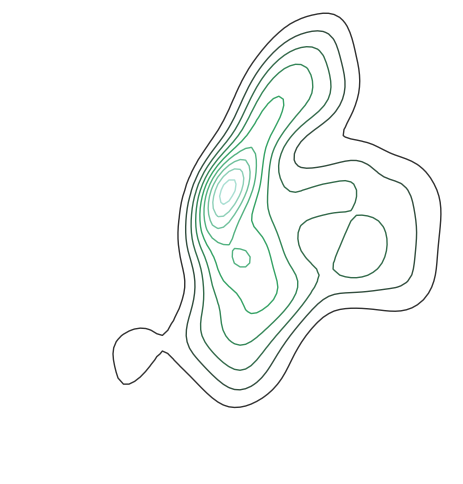

In [28]:
gplt.kdeplot(collisions, projection=ccrs.AlbersEqualArea(), clip=boroughs.geometry)

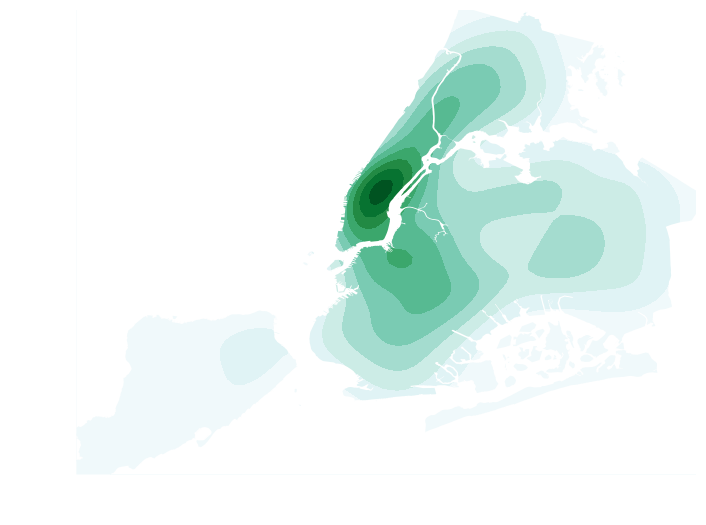

In [48]:
gplt.kdeplot(collisions, clip=boroughs.geometry, shade=True)

In [ ]:
ax = sns.kdeplot(pd.Series([p.x for p in collisions.geometry]), pd.Series([p.y for p in collisions.geometry]),
                 shade=True)
gplt._set_clip(ax, ax.get_extent())